### TODO change face detector here to instantiate ```detect_face.SklearnFaceDetector```

In [4]:
%cd /content/drive/MyDrive/GP/GP_try/test

/content/drive/MyDrive/GP/GP_try/test


In [5]:
!ls ../new_data5/test/face -1 | wc -l
!ls ../new_data5/test/non-face -1 | wc -l
!ls ../new_data5/train/face -1 | wc -l
!ls ../new_data5/train/non-face -1 | wc -l

905
1810
3618
7236


In [3]:
import sys; sys.path.append("../")
from feature_extractor import FeatureExtractor
import torch
import numpy as np
import time
from cascade import CascadeClassifier
import cv2

In [9]:
torch.cuda.is_available()

True

In [10]:
parent = '../hFeatures5_2/'
data_path = 'new_data5'

# Features Extraction

In [11]:
mean = 111.02404842061983
std = 56.926623499738575

In [12]:
def transform1(img):
  return img
  # img = (img - img.mean()) / (img.std() + 1e-8)
  # return cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

In [13]:

feature_extractor = FeatureExtractor(shape=(19,19),
                                     percentile=20,
                                     all_features_file=parent + "all_features.npz",
                                     selected_features_file=parent + "selected_features.npz",
                                     labels_file=parent + "labels.npy",
                                     indecies_file=parent + "indecies.npy",)

In [22]:

X, y = feature_extractor.extractFeatures(pos_path='../'+data_path+'/train/face',
                                  neg_path='../'+data_path+'/train/non-face',
                                  transform=transform1,
                                  save_to_file=False)
print('done')


all_features shape: (63960, 10854)
done


In [ ]:
# del feature_extractor.f2
# del feature_extractor.f3
# del feature_extractor.f4

In [ ]:
indecies, X = feature_extractor.selectPercentile(X, y )
# y = np.load(parent + 'labels.npy')
print(X.shape, y.shape)
print('done')


Now selecting percentile features
(12792, 10854) (10854,)
done


In [ ]:
# temp = np.load('../hFeatures3/all_features.npz')['arr_0']
temp = X
temp

array([[  12.,  -99.,   33., ...,    9.,   77.,   10.],
       [ 165., -116.,   89., ...,   16.,  122.,   19.],
       [  10.,   28.,  -18., ...,    7.,   10.,    0.],
       ...,
       [ -13., -100.,  -12., ...,    2.,    0.,    3.],
       [  30., -157.,  -33., ...,    2.,    0.,    7.],
       [  38.,  -67.,  -22., ...,    1.,   -1.,    4.]], dtype=float32)

In [ ]:
print(temp.min())
print(temp.max())
print(temp[3])
print(temp[4])

-26151.0
29662.0
[ 423. -123.  251. ...   20.  144.   25.]
[ 12.  41. -21. ...   8.  12.   0.]


# Training

In [ ]:
[20]*10

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20]

In [ ]:
X.shape

(10854, 12792)

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

2

In [ ]:
# adaboost from sklearn with base_estimator = DecisionTreeClassifier with max_depth = 1 (stump) and n_estimators = 200
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Take X.T because sklearn expects (n_samples, n_features)
X = X.T
y = y.T


print(X.shape, y.shape)

s_t = time.time()

clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200)
clf.fit(X, y)

print('time:', time.time() - s_t)


(10854, 12792) (10854,)
time: 2286.144472837448


In [ ]:
# %rm StrongClassifier/lastSC.last
# s_t = time.time()
# cascadeClassifier= CascadeClassifier(X, y, batchsize=5000, verbose=True, layers=[200])
# tr_acc = cascadeClassifier.train()

# cascadeClassifier.save(parent + 'cascadeClassifier.pkl')

# print('accuracy: ', tr_acc)
# print('time taken: ', time.time() - s_t, 's')
# print('done')

# Testing

In [1]:
%cd /content/GP_try/test

/content/GP_try/test


In [4]:
import joblib
clf = joblib.load('../hFeatures5_2/clf.joblib')
indecies = np.load('../hFeatures5_2/indecies.npy')

In [5]:
# accuracy imports
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [ ]:
cd /content/GP_try/test

In [19]:
cp -r /content/drive/MyDrive/GP/GP_try/new_data5 new_data5

In [21]:
cd test


/content/GP_try/test


In [14]:
X_test, y_test = feature_extractor.extractFeatures(pos_path='../'+data_path+'/test/face',
                                  neg_path='../'+data_path+'/test/non-face',
                                  transform=transform1,
                                  save_to_file=False)
print('done')


all_features shape: (63960, 2715)
done


In [23]:
X_test.shape

(63960, 2715)

In [15]:
X_test = X_test[indecies]

# convert from torch to numpy and take transpose
X_test = X_test.T

print(X_test.shape, y_test.shape)
print('done')


(2715, 12792) (2715,)
done


In [16]:
# Test accuracy
y_pred = clf.predict(X_test)


In [ ]:
# s_t = time.time()
# t_f_idx_map, t_features, t_labels = feature_extractor.extractFeaturesByIndecies(pos_path='../'+data_path+'/test/face',
#                                             neg_path='../'+data_path+'/test/non-face',
#                                             cascadeClassifier=cascadeClassifier,
#                                             transform=transform1)
# print(t_features.shape, t_labels.shape)
# predictions = cascadeClassifier.predict(t_features, t_f_idx_map)
# print('test accuracy: ', np.sum(predictions == t_labels) / t_labels.shape[0])
# print('time taken: ', time.time() - s_t, 's')

In [17]:
# report
print('accuracy: ', accuracy_score(y_test, y_pred))
print('f1 score macro: ', f1_score(y_test, y_pred, average='macro'))
print('f1 score binary: ', f1_score(y_test, y_pred, average='binary'))
print('f1 score micro: ', f1_score(y_test, y_pred, average='micro'))
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('classification report: \n', classification_report(y_test, y_pred, digits=4))


accuracy:  0.9775322283609577
f1 score macro:  0.9746745957362672
f1 score binary:  0.9661674986134222
f1 score micro:  0.9775322283609577
precision:  0.9699331848552338
recall:  0.9624309392265193
confusion matrix: 
 [[1783   27]
 [  34  871]]
classification report: 
               precision    recall  f1-score   support

           0     0.9813    0.9851    0.9832      1810
           1     0.9699    0.9624    0.9662       905

    accuracy                         0.9775      2715
   macro avg     0.9756    0.9738    0.9747      2715
weighted avg     0.9775    0.9775    0.9775      2715



In [ ]:
from joblib import dump, load
dump(clf, '../hFeatures5_2/clf.joblib')


['../hFeatures5_2/clf.joblib']

# Try full image

In [ ]:
# !mkdir /content/drive/MyDrive/GP/GP_try/hFeatures5_2
# !cp -r ../hFeatures5_2/* /content/drive/MyDrive/GP/GP_try/hFeatures5_2

In [36]:
!mkdir ../hFeatures5_2/
!cp -r /content/drive/MyDrive/GP/GP_try/hFeatures5_2/* ../hFeatures5_2/

In [46]:
!mkdir ../../lfw_all
!cp /content/drive/MyDrive/GP/lfw_all/* ../../lfw_all/

In [30]:
!mkdir ../../ff_all
!cp /content/drive/MyDrive/SBI/SelfBlendedImages/full_frames/* ../../ff_all/

In [31]:
import random
from detect_face import find_face
from PIL import Image
import os
import matplotlib.pyplot as plt
# lfw_all = '../../lfw_all/'
# all_images_names = os.listdir(lfw_all)
ff_all = '../../ff_all/'
all_images_names = os.listdir(ff_all)
# all_images_names = sorted(all_images_names)
random.shuffle(all_images_names)
# all_images_names = [lfw_all + name for name in all_images_names]
all_images_names = [ff_all + name for name in all_images_names]

all_images_names[0]

'../../ff_all/887..png'

In [32]:
show_images = list(range(0, 5))
rectangles_only = True
# resize_to = (100, 100)
random.shuffle(all_images_names)

In [33]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [34]:
feature_extractor.verbose = False

In [41]:
from copy import deepcopy
clf2 = deepcopy(clf)
feature_extractor2 = deepcopy(feature_extractor)

In [ ]:
# from detect_face import FaceDetector
# faceDetector = FaceDetector(clf2, \
#                             feature_extractor2,\

#                             window_size=(19, 19),\
#                             scale_dist=1.1,
#                             max_size=300,
#                             stride=5,

#                             device=device,
#                             use_percentile=False,
#                             makeθ0=False,

#                             verbose=False,
#                             normalize_subwindows=False,
#                             report_time=True,
#                             use_sklearn=True
#                             )

RGB
(180, 320)
{'Getting Subwindows': 0.07810711860656738, 'Resizing Subwindows': 0.3024876117706299, 'Normalize': 1.4781951904296875e-05, 'Extracting Features': 5.475275278091431, 'Classifying': 69.66449022293091}


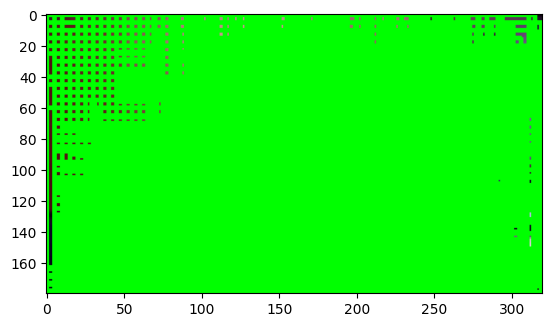

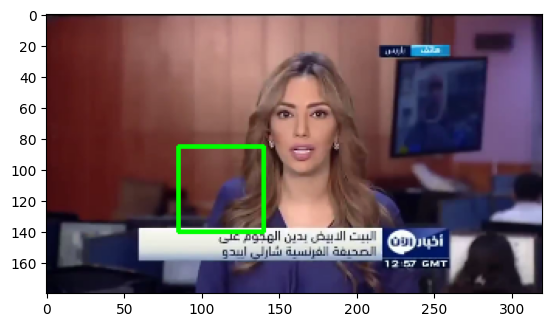

RGB
(270, 480)
{'Getting Subwindows': 0.9540376663208008, 'Resizing Subwindows': 0.9587869644165039, 'Normalize': 1.7881393432617188e-05, 'Extracting Features': 13.113189458847046, 'Classifying': 197.90389037132263}


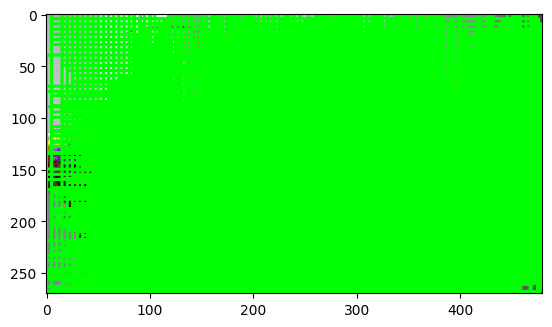

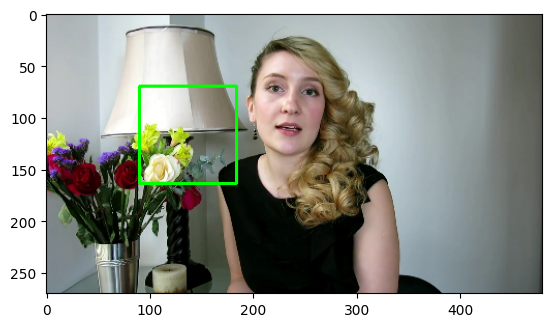

RGB
(120, 150)
{'Getting Subwindows': 0.015105724334716797, 'Resizing Subwindows': 0.05515933036804199, 'Normalize': 8.821487426757812e-06, 'Extracting Features': 1.775644063949585, 'Classifying': 16.008111238479614}


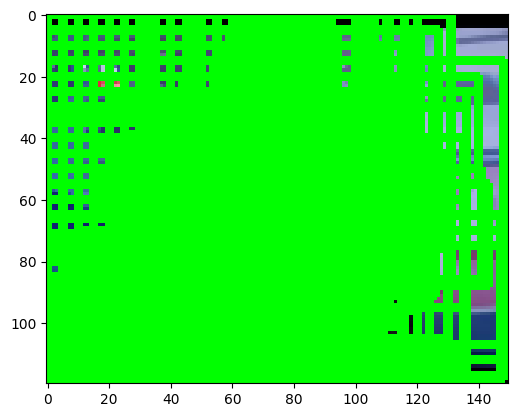

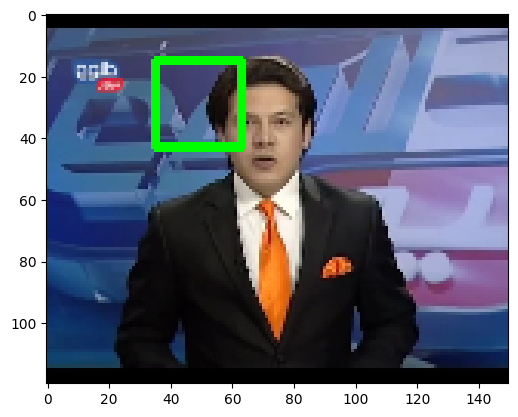

RGB
(270, 480)
{'Getting Subwindows': 0.9545562267303467, 'Resizing Subwindows': 0.9712908267974854, 'Normalize': 1.3828277587890625e-05, 'Extracting Features': 13.680646896362305, 'Classifying': 199.90079498291016}


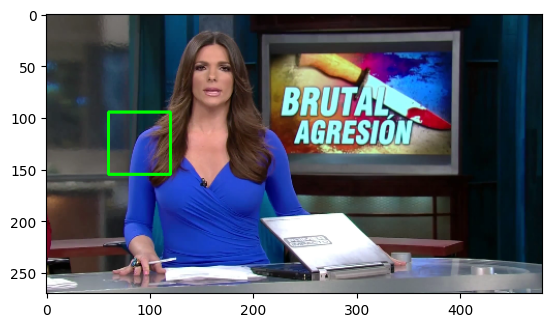

RGB
(180, 320)
{'Getting Subwindows': 0.09333324432373047, 'Resizing Subwindows': 0.28133130073547363, 'Normalize': 1.0251998901367188e-05, 'Extracting Features': 5.2165515422821045, 'Classifying': 75.36609888076782}


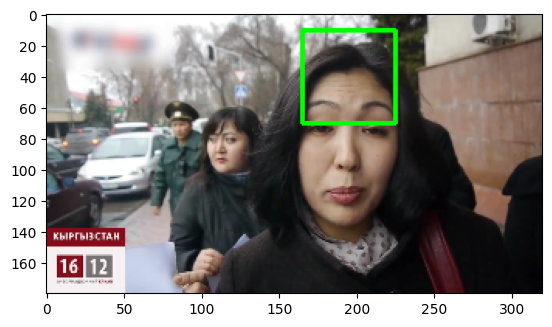

In [45]:
for i in show_images:
  # >>>> Read image <<<<
  img = Image.open(all_images_names[i])
  print(img.mode)
  img = np.array(img)
  img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4))
  org_sh = img.shape
  if not rectangles_only:
    plt.imshow(img)
    plt.show()
  # get subwindows
  img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  print(img2.shape)

  # >>>> Normalize image <<<<
  # normalize image
  # img2 = (img2 - img2.mean()) / img2.std()
  # img2 = cv2.resize(img, resize_to)
  # print(img2.shape)

  # img2 = cv2.normalize(img2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  # resize image
  # img2 = cv2.resize(img2, (570, 380))

  # show image
  if not rectangles_only:
    plt.imshow(img2, cmap='gray')
    plt.show()

  # +++++++++++++++++++++
  # find face
  # >>>> Find face <<<<
  face_coordinates, region_max_conf, max_conf , timing=find_face(img2, \
                              clf, \
                              feature_extractor, \
                              window_size=(19, 19), \
                              scale_dist=1.1, \
                              max_size=300, \
                              stride=5, \
                              device=device, \
                              verbose=False,
                              report_time=True,
                              use_sklearn=True)
  print(timing)
  # region_max_conf *= img.shape[0] / resize_to[0]
  # ++++++++++++++++++++
  # rectangles
  # >>>> Draw rectangles <<<<
  tmp_img = img.copy()
  for face_coordinate in face_coordinates:
      for x1, y1, x2, y2 in face_coordinate:
          cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  # if not rectangles_only:
  plt.imshow(tmp_img)
  plt.show()

  # >>>> Draw rectangles with max confidence <<<<
  # amx confidence
  tmp_img = img.copy()
  x1, y1, x2, y2 = region_max_conf
  cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  plt.imshow(tmp_img)
  plt.show()



In [27]:
import random
from detect_face import find_face
from PIL import Image
import os
import matplotlib.pyplot as plt
lfw_all = '../../lfw_all/'
all_images_names = os.listdir(lfw_all)
# all_images_names = sorted(all_images_names)
random.shuffle(all_images_names)
all_images_names = [lfw_all + name for name in all_images_names]

all_images_names[0]

'../../lfw_all/Daryl_Hannah_0002.jpg'

In [28]:
show_images = list(range(0, 5))
rectangles_only = True
# resize_to = (100, 100)
random.shuffle(all_images_names)

In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [30]:
feature_extractor.verbose = False

In [61]:
from copy import deepcopy
clf2 = deepcopy(clf)
feature_extractor2 = deepcopy(feature_extractor)

In [ ]:
# from detect_face import FaceDetector
# faceDetector = FaceDetector(clf2, \
#                             feature_extractor2,\

#                             window_size=(19, 19),\
#                             scale_dist=1.1,
#                             max_size=300,
#                             stride=5,

#                             device=device,
#                             use_percentile=False,
#                             makeθ0=False,

#                             verbose=False,
#                             normalize_subwindows=False,
#                             report_time=True,
#                             use_sklearn=True
#                             )

In [ ]:
# from detect_face import FaceDetector
# faceDetector = FaceDetector(clf2, \
#                             feature_extractor2,\

#                             window_size=(19, 19),\
#                             scale_dist=1.1,
#                             max_size=300,
#                             stride=5,

#                             device=device,
#                             use_percentile=False,
#                             makeθ0=False,

#                             verbose=False,
#                             normalize_subwindows=False,
#                             report_time=True,
#                             use_sklearn=True
#                             )

RGB
(250, 250)
{'Getting Subwindows': 0.18463921546936035, 'Resizing Subwindows': 0.3267192840576172, 'Normalize': 1.1920928955078125e-05, 'Extracting Features': 5.850210666656494, 'Classifying': 79.55806422233582}


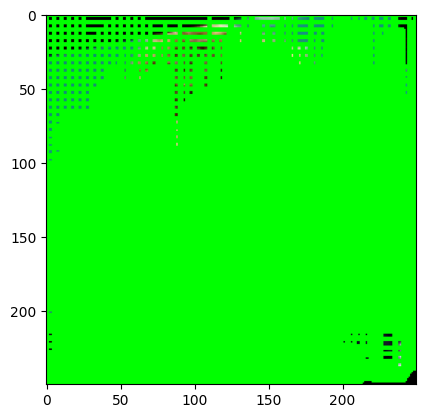

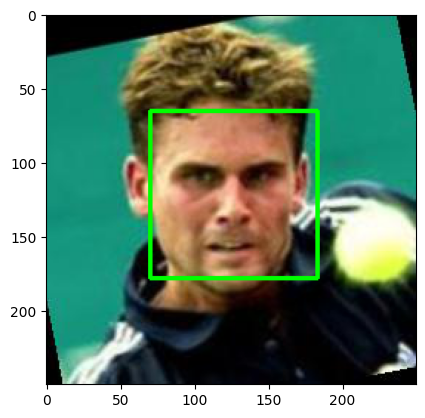

RGB
(250, 250)
{'Getting Subwindows': 0.12295866012573242, 'Resizing Subwindows': 0.38310933113098145, 'Normalize': 1.3589859008789062e-05, 'Extracting Features': 6.010462045669556, 'Classifying': 81.7195405960083}


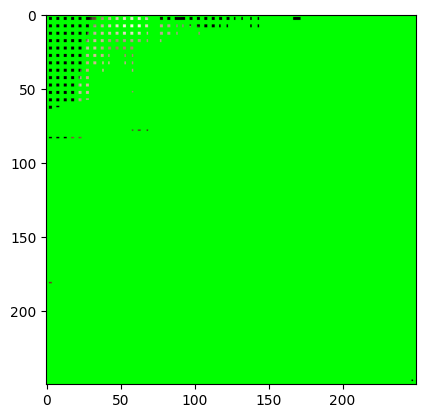

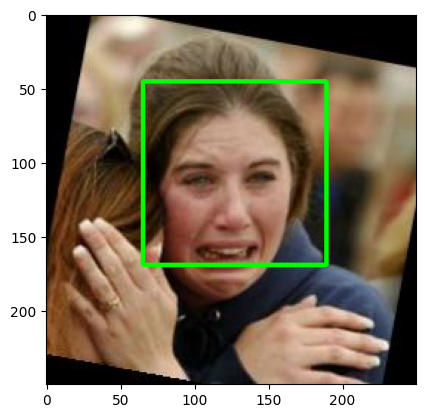

RGB
(250, 250)
{'Getting Subwindows': 0.1401081085205078, 'Resizing Subwindows': 0.334378719329834, 'Normalize': 1.5497207641601562e-05, 'Extracting Features': 5.891313314437866, 'Classifying': 81.89595103263855}


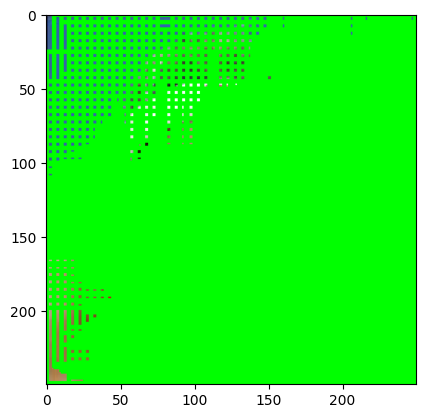

RGB
(250, 250)
{'Getting Subwindows': 0.1904613971710205, 'Resizing Subwindows': 0.32349085807800293, 'Normalize': 1.1682510375976562e-05, 'Extracting Features': 5.698866128921509, 'Classifying': 79.87147450447083}


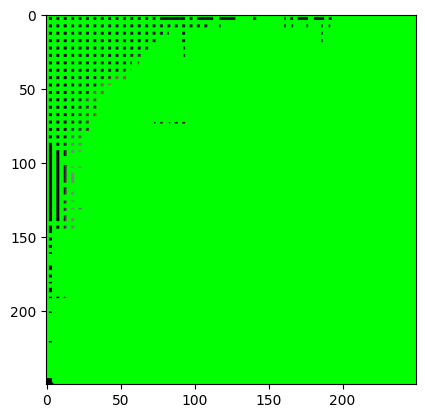

RGB
(250, 250)
{'Getting Subwindows': 0.18858623504638672, 'Resizing Subwindows': 0.3197646141052246, 'Normalize': 1.5020370483398438e-05, 'Extracting Features': 5.7505059242248535, 'Classifying': 81.40176486968994}


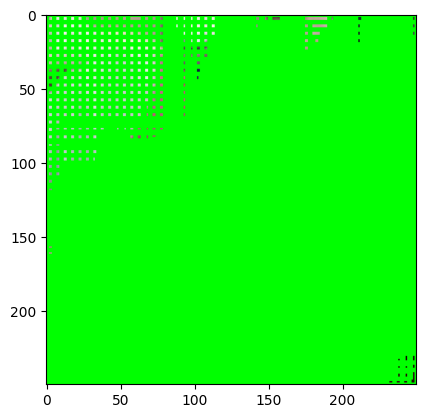

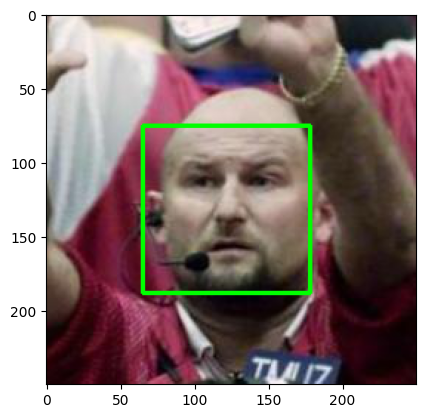

In [62]:
for i in show_images:
  # >>>> Read image <<<<
  img = Image.open(all_images_names[i])
  print(img.mode)
  img = np.array(img)
  # img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4))
  org_sh = img.shape
  if not rectangles_only:
    plt.imshow(img)
    plt.show()
  # get subwindows
  img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  print(img2.shape)

  # >>>> Normalize image <<<<
  # normalize image
  # img2 = (img2 - img2.mean()) / img2.std()
  # img2 = cv2.resize(img, resize_to)
  # print(img2.shape)

  # img2 = cv2.normalize(img2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  # resize image
  # img2 = cv2.resize(img2, (570, 380))

  # show image
  if not rectangles_only:
    plt.imshow(img2, cmap='gray')
    plt.show()

  # +++++++++++++++++++++
  # find face
  # >>>> Find face <<<<
  face_coordinates, region_max_conf, max_conf , timing=find_face(img2, \
                              clf, \
                              feature_extractor, \
                              window_size=(19, 19), \
                              scale_dist=1.1, \
                              max_size=300, \
                              stride=5, \
                              device=device, \
                              verbose=False,
                              report_time=True,
                              use_sklearn=True)
  print(timing)
  # region_max_conf *= img.shape[0] / resize_to[0]
  # ++++++++++++++++++++
  # rectangles
  # >>>> Draw rectangles <<<<
  tmp_img = img.copy()
  for face_coordinate in face_coordinates:
      for x1, y1, x2, y2 in face_coordinate:
          cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  # if not rectangles_only:
  plt.imshow(tmp_img)
  plt.show()

  # >>>> Draw rectangles with max confidence <<<<
  # amx confidence
  tmp_img = img.copy()
  x1, y1, x2, y2 = region_max_conf
  cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  plt.imshow(tmp_img)
  plt.show()



# Create faster sklearn classifier

In [18]:
X_train = np.load('../hFeatures5_2/selected_features.npz')['arr_0']

In [19]:
X_train.T.shape

(10854, 12792)

In [20]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(clf, prefit=True)
feature_indices = selector.get_support(indices=True)
X_train_selected = selector.transform(X_train.T)
X_test_selected = selector.transform(X_test)
print(X_train_selected.shape)
print(X_test_selected.shape)
print(X_train.T[:, feature_indices].shape)
print(X_test[:, feature_indices].shape)
print((X_train.T[:, feature_indices] == X_train_selected).all())
print((X_test[:, feature_indices] == X_test_selected).all())

(10854, 192)
(2715, 192)
(10854, 192)
(2715, 192)
True
True


In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


s_t = time.time()

clf_selected = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200)
clf_selected.fit(X_train_selected, y)

print('time:', time.time() - s_t)

time: 31.04924488067627


In [24]:
y_pred2 = clf_selected.predict(X_test_selected)

In [25]:
# report
print('accuracy: ', accuracy_score(y_test, y_pred2))
print('f1 score macro: ', f1_score(y_test, y_pred2, average='macro'))
print('f1 score binary: ', f1_score(y_test, y_pred2, average='binary'))
print('f1 score micro: ', f1_score(y_test, y_pred2, average='micro'))
print('precision: ', precision_score(y_test, y_pred2))
print('recall: ', recall_score(y_test, y_pred2))
print('confusion matrix: \n', confusion_matrix(y_test, y_pred2))
print('classification report: \n', classification_report(y_test, y_pred2, digits=4))


accuracy:  0.9775322283609577
f1 score macro:  0.9746745957362672
f1 score binary:  0.9661674986134222
f1 score micro:  0.9775322283609577
precision:  0.9699331848552338
recall:  0.9624309392265193
confusion matrix: 
 [[1783   27]
 [  34  871]]
classification report: 
               precision    recall  f1-score   support

           0     0.9813    0.9851    0.9832      1810
           1     0.9699    0.9624    0.9662       905

    accuracy                         0.9775      2715
   macro avg     0.9756    0.9738    0.9747      2715
weighted avg     0.9775    0.9775    0.9775      2715



In [128]:
from importlib import reload
import detect_face
reload(detect_face)
from detect_face import find_face


In [129]:
detect_face

<module 'detect_face' from '/content/GP_try/detect_face.py'>

In [98]:
joblib.dump(clf_selected, "/content/drive/MyDrive/GP/GP_try/hFeatures5_2/clf_selected.joblib")
joblib.dump(selector, "/content/drive/MyDrive/GP/GP_try/hFeatures5_2/sklearn_selector.joblib")

['/content/drive/MyDrive/GP/GP_try/hFeatures5_2/sklearn_selector.joblib']

RGB
(250, 250)
{'Getting Subwindows': 0.11315202713012695, 'Resizing Subwindows': 0.264721155166626, 'Normalize': 1.239776611328125e-05, 'Extracting Features': 4.441457986831665, 'Classifying': 5.049891948699951}


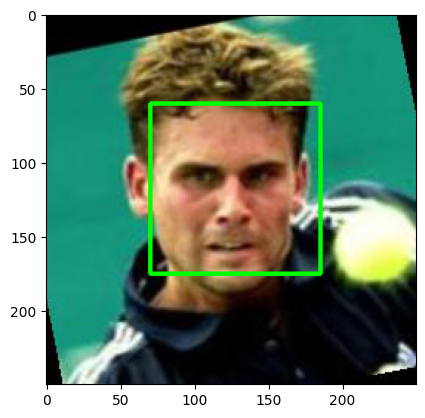

RGB
(250, 250)
{'Getting Subwindows': 0.09509873390197754, 'Resizing Subwindows': 0.24070167541503906, 'Normalize': 1.049041748046875e-05, 'Extracting Features': 4.312806129455566, 'Classifying': 4.854984283447266}


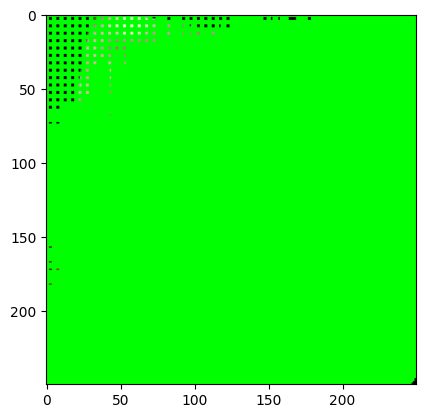

RGB
(250, 250)
{'Getting Subwindows': 0.12029719352722168, 'Resizing Subwindows': 0.24059438705444336, 'Normalize': 1.0967254638671875e-05, 'Extracting Features': 4.312113046646118, 'Classifying': 4.485840082168579}


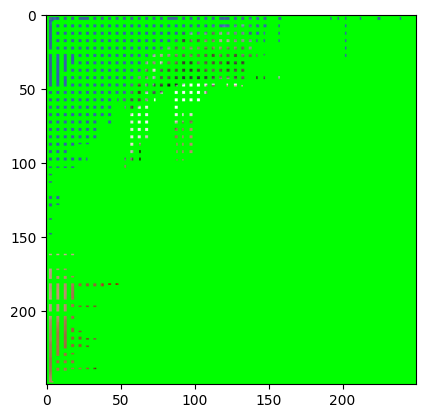

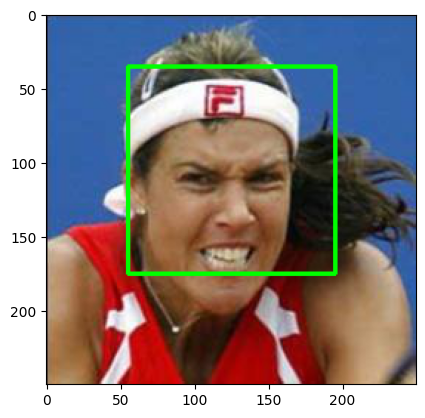

RGB
(250, 250)
{'Getting Subwindows': 0.1361088752746582, 'Resizing Subwindows': 0.26630616188049316, 'Normalize': 1.2159347534179688e-05, 'Extracting Features': 4.688246726989746, 'Classifying': 4.955641031265259}


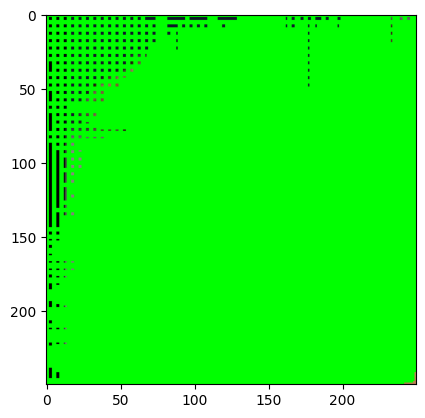

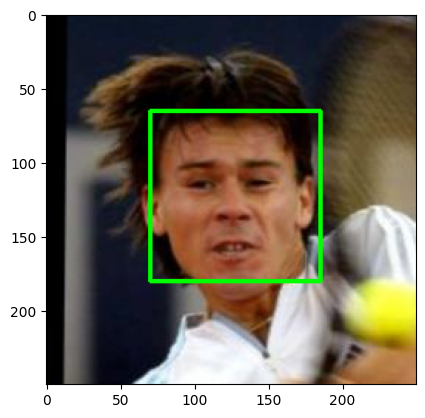

RGB
(250, 250)
{'Getting Subwindows': 0.14248442649841309, 'Resizing Subwindows': 0.2885324954986572, 'Normalize': 2.09808349609375e-05, 'Extracting Features': 4.993673324584961, 'Classifying': 5.585427761077881}


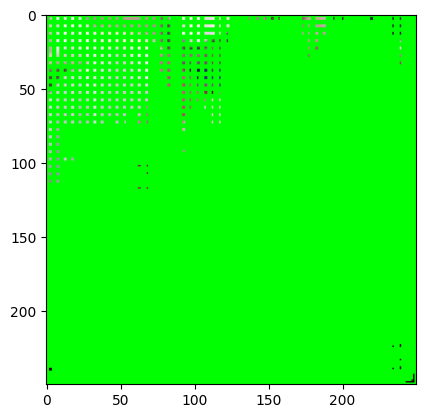

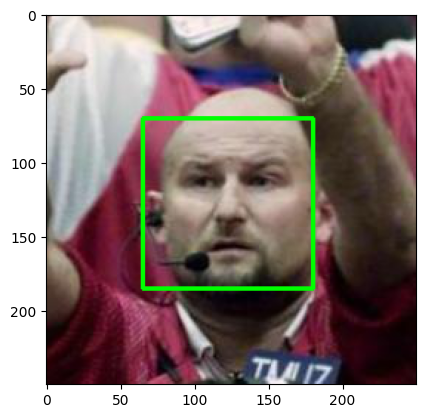

In [130]:
for i in show_images:
  # >>>> Read image <<<<
  img = Image.open(all_images_names[i])
  print(img.mode)
  img = np.array(img)
  # img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4))
  org_sh = img.shape
  if not rectangles_only:
    plt.imshow(img)
    plt.show()
  # get subwindows
  img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  print(img2.shape)

  # >>>> Normalize image <<<<
  # normalize image
  # img2 = (img2 - img2.mean()) / img2.std()
  # img2 = cv2.resize(img, resize_to)
  # print(img2.shape)

  # img2 = cv2.normalize(img2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  # resize image
  # img2 = cv2.resize(img2, (570, 380))

  # show image
  if not rectangles_only:
    plt.imshow(img2, cmap='gray')
    plt.show()

  # +++++++++++++++++++++
  # find face
  # >>>> Find face <<<<
  face_coordinates, region_max_conf, max_conf , timing=find_face(img2, \
                              clf_selected, \
                              feature_extractor, \
                              window_size=(19, 19), \
                              scale_dist=1.1, \
                              max_size=300, \
                              stride=5, \
                              device=device, \
                              verbose=False,
                              report_time=True,
                              use_sklearn=True,
                              sklearn_selector=selector)
  print(timing)
  # region_max_conf *= img.shape[0] / resize_to[0]
  # ++++++++++++++++++++
  # rectangles
  # >>>> Draw rectangles <<<<
  tmp_img = img.copy()
  for face_coordinate in face_coordinates:
      for x1, y1, x2, y2 in face_coordinate:
          cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  # if not rectangles_only:
  plt.imshow(tmp_img)
  plt.show()

  # >>>> Draw rectangles with max confidence <<<<
  # amx confidence
  tmp_img = img.copy()
  x1, y1, x2, y2 = region_max_conf
  cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  plt.imshow(tmp_img)
  plt.show()



In [137]:
len(indecies)

12792

In [39]:
import random
from detect_face import find_face
from PIL import Image
import os
import matplotlib.pyplot as plt
ff_all = '../../ff_all/'
all_images_names = os.listdir(ff_all)
# all_images_names = sorted(all_images_names)
random.shuffle(all_images_names)
all_images_names = [ff_all + name for name in all_images_names]

all_images_names[0]

'../../ff_all/171..png'

In [40]:
show_images = list(range(0, 5))
rectangles_only = True
# resize_to = (100, 100)
random.shuffle(all_images_names)

In [46]:
rectangles_only = True

RGB
(480, 640)


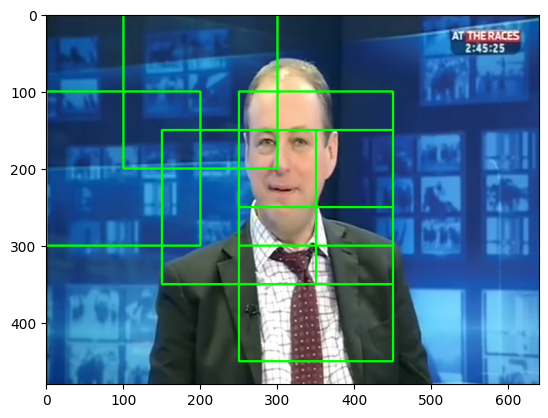

RGB
(1080, 1920)


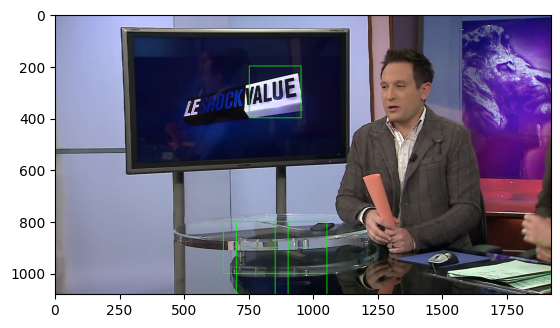

RGB
(720, 1280)


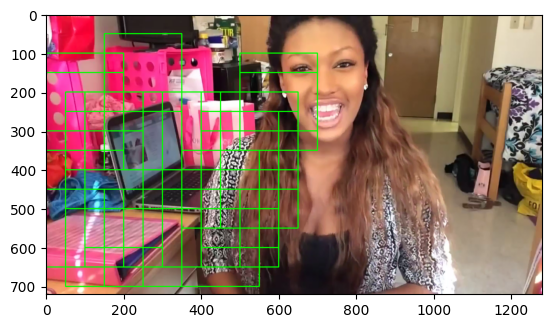

RGB
(480, 640)


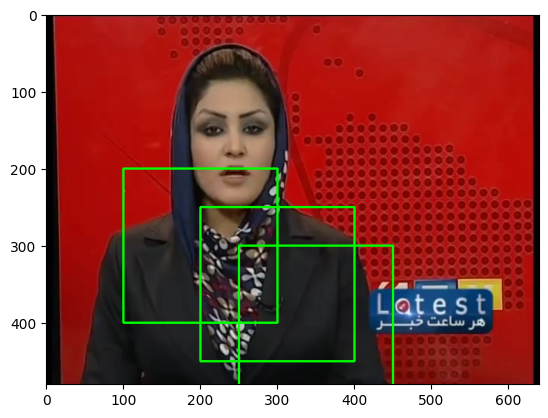

RGB
(1080, 1920)


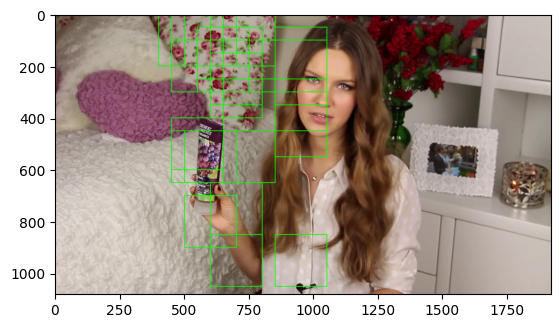

In [47]:
for i in show_images:
  # >>>> Read image <<<<
  img = Image.open(all_images_names[i])
  print(img.mode)
  img = np.array(img)
  # img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4))
  org_sh = img.shape
  if not rectangles_only:
    plt.imshow(img)
    plt.show()
  # continue
  # get subwindows
  img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  print(img2.shape)

  # show image
  if not rectangles_only:
    plt.imshow(img2, cmap='gray')
    plt.show()

  # +++++++++++++++++++++
  # >>>> Find face <<<<
  ws = 200 # window size
  stride=50
  tmp_img = img.copy()
  for j in range(0, img.shape[1], stride):
    for k in range(0, img.shape[0], stride):
      if j + ws >= img.shape[1] or j + ws >= img.shape[0]:
        break
      cropped = img2[k:k+ws, j:j+ws]
      cropped = cv2.resize(cropped, (19, 19))
      ii = feature_extractor.getIntegralImage(cropped)[np.newaxis, :]


      features = feature_extractor.getFeaturesFromDesc(feature_extractor.f2, feature_extractor.f3, feature_extractor.f4, (ii, None))[indecies]
      features = selector.transform(features.T)
      if clf_selected.predict(features) == 1:
        cv2.rectangle(tmp_img, (j, k), (j + ws, k + ws),(0, 255, 0), 2)
  plt.imshow(tmp_img)
  plt.show()